# SPAM MESSAGE DETECTION USING NATURAL LANGUAGE PROCESSING

DATASET SOURCE : 'UCI-MACHINE LEARNING REPOSITRY'

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### IMPORTING DATASET

In [2]:
dataset=pd.read_csv('SMSSpamCollection.tsv',delimiter="    ",header=None,engine='python',quoting = 3)
dataset.columns=['SMS','Spam']

#Dataset is found in plain text format,I have done some edits to convert it to a 'Tab separated' file format 

In [3]:
dataset.head(10)

,SMS,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don\t think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it\s been 3 week\s n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request \Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


In [4]:
dataset.shape

(5574, 2)

In [5]:
dataset.Spam.unique()

array([0, 1], dtype=int64)

In [6]:
dataset['Spam'].value_counts()


0    4827
1     747
Name: Spam, dtype: int64

### VISUALISING THE AMOUNT OF SPAM SMS

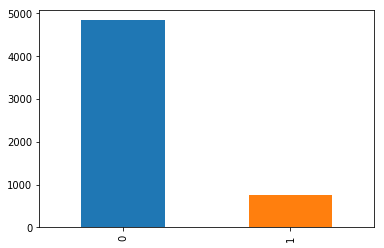

In [7]:
dataset['Spam'].value_counts().plot(kind="bar")

    '0' is a legitimate sms
    '1' is a Spam sms

## CLEANING THE TEXT

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
corpus = []
for i in range(0, 5574):
    SMS = re.sub('[^a-zA-Z]', ' ', dataset['SMS'][i])
    SMS = SMS.lower()
    SMS = SMS.split()
    ps = PorterStemmer()
    SMS = [ps.stem(word) for word in SMS if not word in set(stopwords.words('english'))]
    SMS = ' '.join(SMS)
    corpus.append(SMS)

In [10]:
corpus[1:5]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

## CREATING THE BAG OF WORDS MODEL

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

## SPLITTING THE TRAIN-TEST SETS

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

## FITTING THE NAIVE BAYES CLASSIFIER TO TRAINING DATASET

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

## METRICS FOR EVALUATING THE DATASET

### Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1705  225]
 [  41  259]]


### F1-Score

In [18]:
from sklearn.metrics import f1_score
print("f1-Score : {}%".format(f1_score(y_test, y_pred, average='macro')*100))

f1-Score : 79.41765117363593%


### Accuracy-score

In [19]:
print("Accuracy score : {}%".format(classifier.score(X_test,y_test)*100))

Accuracy score : 88.07174887892377%


### Recall-Score

In [20]:
from sklearn.metrics import recall_score  
print("Recall-Score : {}%".format(recall_score(y_test, y_pred, average='macro')*100))

Recall-Score : 87.33765112262522%
